## LIBRERIAS

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas_ta as ta 
import pandas as pd
from binance.client import Client
from dotenv import load_dotenv
import os
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
from backtesting import Strategy, Backtest
import numpy as np
from binance.enums import HistoricalKlinesType
import pandas_montecarlo


## OBTENCIÓN DE DATOS SPOT


In [19]:
# def save_data(symbol,interval,start_date,end_date):
#     api_key = os.getenv('PUBLIC2')
#     secret = os.getenv('SECRET2')

#     load_dotenv()
#     client = Client(api_key,secret)

#     history = client.get_historical_klines(symbol = symbol, interval = interval, start_str = start_date, end_str=end_date)
#     df = pd.DataFrame(data = history)
#     clean_df = df.drop(columns=[0,7,8,9,10,11])
#     clean_df.columns = ['Open','High','Low','Close','Volume','time']
#     clean_df['time'] = pd.to_datetime(clean_df['time'], unit='ms')
#     dict_cols = {'Open':float, 'High':float, 'Low':float, 'Close':float,'Volume':float}
#     newdf = clean_df.astype(dict_cols)
#     newdf.set_index('time', inplace=True)
    
#     return newdf

# df1 = save_data(symbol='ADAUSDT',interval='1h',start_date='13 Aug, 2018',end_date='13 Sep, 2021')
# df1

## OBTENCIÓN DE DATOS FUTUROS

In [2]:
load_dotenv()

public = os.getenv('PUBLIC1')
private = os.getenv('SECRET1')

def save_data(symbol,interval,start_date,end_date):
    
    
    client = Client(public,private)

    history = client.get_historical_klines_generator(symbol = symbol, interval = interval, start_str = start_date, end_str=end_date,klines_type=HistoricalKlinesType.FUTURES)
    df = pd.DataFrame(data = history)
    clean_df = df.drop(columns=[0,7,8,9,10,11])
    clean_df.columns = ['Open','High','Low','Close','Volume','time']
    clean_df['time'] = pd.to_datetime(clean_df['time'], unit='ms')
    dict_cols = {'Open':float, 'High':float, 'Low':float, 'Close':float,'Volume':float}
    newdf = clean_df.astype(dict_cols)
    newdf.set_index('time', inplace=True)
    
    return newdf


df1 = save_data(symbol='BTCUSDT',interval='1h', start_date='31 Jan, 2020', end_date='17 Feb, 2022') # si es BTC, se debe dividir el DF por 100000000 satoshis
df = save_data(symbol='BTCUSDT',interval='1h', start_date='31 Jan, 2020', end_date='17 Oct, 2022') # si es BTC, se debe dividir el DF por 100000000 satoshis


In [3]:
df1['ATR'] = df1.ta.atr()
df1.dropna(inplace=True)
df1 = df1/100000000

In [4]:
df1

,Open,High,Low,Close,Volume,ATR
time,,,,,,
2020-01-31 14:59:59.999,0.000093,0.000093,0.000092,0.000093,0.000056,6.859071e-07
2020-01-31 15:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000054,6.914566e-07
2020-01-31 16:59:59.999,0.000093,0.000094,0.000093,0.000093,0.000085,7.228740e-07
2020-01-31 17:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000048,6.999330e-07
2020-01-31 18:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000036,6.814021e-07
...,...,...,...,...,...,...
2022-02-16 20:59:59.999,0.000442,0.000444,0.000441,0.000441,0.000090,3.333684e-06
2022-02-16 21:59:59.999,0.000441,0.000442,0.000438,0.000441,0.000065,3.314850e-06
2022-02-16 22:59:59.999,0.000441,0.000441,0.000439,0.000440,0.000052,3.218789e-06


In [5]:
df /= 100000000
df['ATR'] = df.ta.atr()
df.dropna(inplace=True)


In [6]:
df

,Open,High,Low,Close,Volume,ATR
time,,,,,,
2020-01-31 14:59:59.999,0.000093,0.000093,0.000092,0.000093,0.000056,6.859071e-07
2020-01-31 15:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000054,6.914566e-07
2020-01-31 16:59:59.999,0.000093,0.000094,0.000093,0.000093,0.000085,7.228740e-07
2020-01-31 17:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000048,6.999330e-07
2020-01-31 18:59:59.999,0.000093,0.000093,0.000093,0.000093,0.000036,6.814021e-07
...,...,...,...,...,...,...
2022-10-16 20:59:59.999,0.000194,0.000194,0.000193,0.000193,0.000313,7.178047e-07
2022-10-16 21:59:59.999,0.000193,0.000194,0.000191,0.000191,0.000233,8.538901e-07
2022-10-16 22:59:59.999,0.000191,0.000194,0.000191,0.000193,0.000311,9.691837e-07


## ESTRATEGIA VWAP & RSI

In [26]:
'''
Lógica de estrategia:
Cuando el precio de cierre de la última vela es mayor al VWAP y el RSI cruza por debajo de 30, se abre una posición larga.
Cuando el precio de cierre de la última vela es menor al VWAP y el RSI cruza por encima de 70, se abre una posición corta.
'''

class MyStrat(Strategy):
    
    riskpct = 0.02
    rsi_window = 2
    os = 10
    ob = 90
    slatrratio = 1.5
    tpslratio = 1.5
    
    def init(self):
        super().init()

        self.vwap = self.I(lambda: ta.vwap(self.data.High.s, self.data.Low.s, self.data.Close.s, self.data.Volume.s, anchor='W'))
        self.rsi = self.I(lambda: ta.rsi(self.data.Close.s, length=self.rsi_window))

    def next(self):
        super().next()
        slatr = self.data.ATR[-1] * self.slatrratio
        price = self.data.Close[-1]
        
        # if self.position:
        #     self.position.close()
        
        if len(self.trades) > 0:
            if self.trades[-1].is_long and self.rsi >= self.ob and price < self.vwap:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.rsi <= self.os and price > self.vwap:
                self.trades[-1].close()
            
        if self.rsi <= self.os and price > self.vwap:
            sl1 = price - slatr
            tp1 = price + (slatr * self.tpslratio)
            #self.position.close()       
            
            self.buy(sl = sl1, tp = tp1, size = self.riskpct) 
            
        elif self.rsi >= self.ob and price < self.vwap:
            sl2 = price + slatr
            tp2 = price - (slatr * self.tpslratio)  
            #self.position.close()

            self.sell(sl = sl2, tp = tp2, size = self.riskpct)

## RESULTADOS

In [27]:
# --------------------------------Stats--------------------------------
bt = Backtest(df1, MyStrat, cash=100000, margin=1/1, commission = 0.0006, trade_on_close=True, hedging=True)
stat = bt.run()
print(stat)
# print(f'Ret/DD Ratio: {retDD_ratio(stat)}')

# --------------------------------Plot---------------------------------
# plot = bt.plot(plot_volume=False)
# print(plot)

# --------------------------------Trades-------------------------------
trades_size = stat['_trades']#['Size'] 
print(trades_size) # shows the size of the trades
# #plt.bar(trades_size, height=trades_size.count())

Start                     2020-01-31 14:59...
End                       2022-02-17 00:59...
Duration                    747 days 10:00:00
Exposure Time [%]                   38.251854
Equity Final [$]                104496.439661
Equity Peak [$]                 105109.357384
Return [%]                            4.49644
Buy & Hold Return [%]              375.000323
Return (Ann.) [%]                     2.16649
Volatility (Ann.) [%]                 1.72884
Sharpe Ratio                         1.253147
Sortino Ratio                        1.910382
Calmar Ratio                         1.038042
Max. Drawdown [%]                   -2.087093
Avg. Drawdown [%]                   -0.093155
Max. Drawdown Duration      261 days 19:00:00
Avg. Drawdown Duration        5 days 15:00:00
# Trades                                  950
Win Rate [%]                             46.0
Best Trade [%]                       11.86604
Worst Trade [%]                     -5.863216
Avg. Trade [%]                    

## MONTECARLO ANALISIS

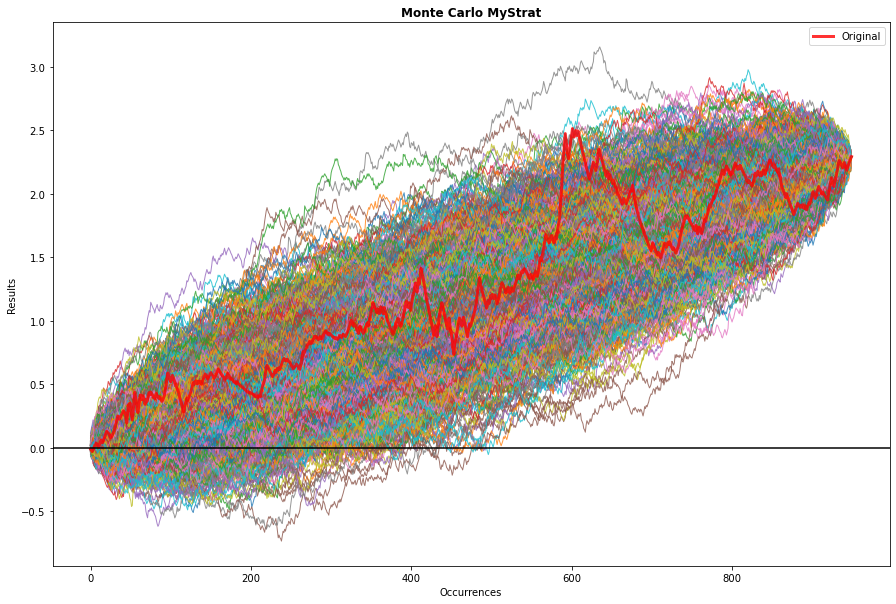

Estadisticas de la simulación: {'min': 2.291957877536726, 'max': 2.2919578775367397, 'mean': 2.291957877536767, 'median': 2.291957877536732, 'std': 3.477043900088509e-14, 'maxdd': -0.7328768322237849, 'bust': 0.416, 'goal': 0.584}
Estadisticas DD Max: {'min': -0.7328768322237849, 'max': -6.572778483926456e-06, 'mean': -0.12397201047523917, 'median': -0.09157296421851524, 'std': 0.11005388553193196}


In [28]:
def montecarlo(statistics):
    
    mc = statistics._trades['ReturnPct'].montecarlo(sims=1000, bust = -0.1, goal = 0.90)
    mc.plot(title = 'Monte Carlo MyStrat', figsize = (15,10))
    print(f'Estadisticas de la simulación: {mc.stats}')
    print(f'Estadisticas DD Max: {mc.maxdd}')
    
montecarlo(stat)

## OPTIMIZACIÓN

In [10]:
stats = bt.optimize(
        rsi_window = range(2, 14, 2),
        ob = range(65, 95, 5),
        os = range(5, 35, 5),
        slatrratio = list(np.arange(1.5, 3.0, 0.5)),
        tpslratio = list(np.arange(1.5, 4.0, 0.5)),
        maximize = 'Calmar Ratio')

print(stats)
print(stats._strategy)

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

Start                     2020-01-31 14:59...
End                       2022-02-17 00:59...
Duration                    747 days 10:00:00
Exposure Time [%]                   35.219354
Equity Final [$]                 108950.65949
Equity Peak [$]                 109252.302733
Return [%]                           8.950659
Buy & Hold Return [%]              375.000323
Return (Ann.) [%]                    4.266003
Volatility (Ann.) [%]                2.245462
Sharpe Ratio                         1.899833
Sortino Ratio                        3.382643
Calmar Ratio                         2.455835
Max. Drawdown [%]                   -1.737088
Avg. Drawdown [%]                   -0.114523
Max. Drawdown Duration      261 days 19:00:00
Avg. Drawdown Duration        4 days 06:00:00
# Trades                                 1067
Win Rate [%]                        48.078725
Best Trade [%]                      20.216913
Worst Trade [%]                     -5.684979
Avg. Trade [%]                    

## MONTECARLO ANALISIS OPTIMIZADO

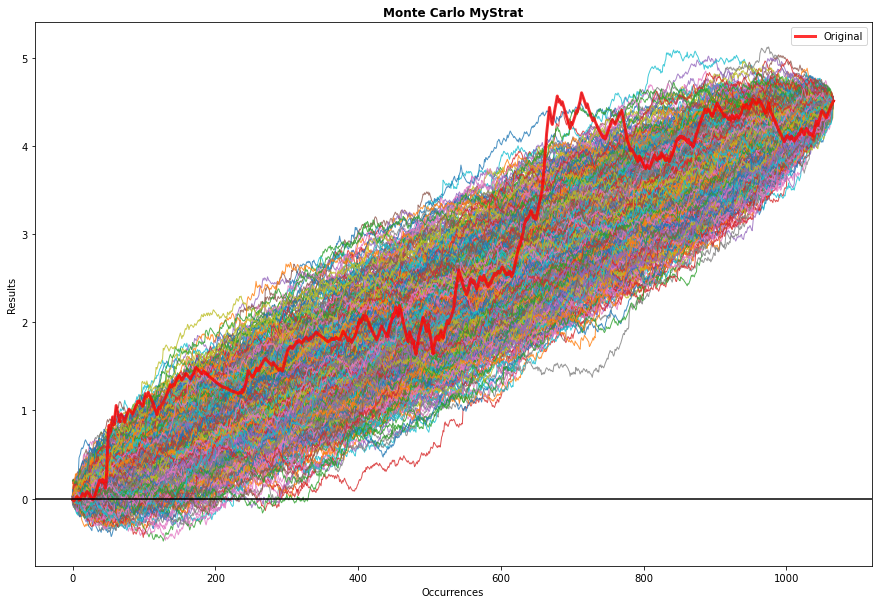

Estadisticas de la simulación: {'min': 4.511915976220817, 'max': 4.511915976220848, 'mean': 4.51191597622076, 'median': 4.5119159762208305, 'std': 7.09758645711791e-14, 'maxdd': -0.4820771491304633, 'bust': 0.241, 'goal': 0.759}
Estadisticas DD Max: {'min': -0.4820771491304633, 'max': -0.00010973941058045611, 'mean': -0.08236788274788588, 'median': -0.05947035426346803, 'std': 0.07576229646630943}


In [11]:
montecarlo(stats)